# Spark Funds investments

"""Spark Funds wants to make investments in a few companies. The CEO of Spark Funds wants to understand the global trends in investments so that she can take the investment decisions effectively.

Spark Funds has two minor constraints for investments:

It wants to invest between 5 to 15 million USD per round of investment. It wants to invest only in English-speaking countries because of the ease of communication with the companies it would invest in.

For the analysis, I consider a country to be English speaking only if English is one of the official languages in that country

These conditions will give you sufficient information for your initial analysis. Before getting to specific questions, let’s understand the problem and the data first."""

Description
"""

What is the strategy?
Spark Funds wants to invest where most other investors are investing. This pattern is often observed among early stage startup investors.

Where does the data come from? The data is taken real investment data from crunchbase.com, so the insights one may get may be incredibly useful. For this assignment, the the data is divided into the following files:
Three main data tables to be used for the entire analysis. They are given in the code section.

What is Spark Funds’ business objective?
The business objectives and goals of data analysis are pretty straightforward.

Business objective: The objective is to identify the best sectors, countries, and a suitable investment type for making investments. The overall strategy is to invest where others are investing, implying that the 'best' sectors and countries are the ones 'where most investors are investing'.

Goals of data analysis: The goals are divided into three sub-goals:

Investment type analysis: Comparing the typical investment amounts in the venture, seed, angel, private equity etc. so that Spark Funds can choose the type that is best suited for their strategy.

Country analysis: Identifying the countries which have been the most heavily invested in the past. These will be Spark Funds’ favourites as well.

Sector analysis: Understanding the distribution of investments across the eight main sectors. (Note that we are interested in the eight 'main sectors' provided in the mapping file. The two files — companies and rounds2 — have numerous sub-sector names; hence, you will need to map each sub-sector to its main sector.) """

# 1.Understand the Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt       #import the libraries
import seaborn as sns
%matplotlib inline                     

In [2]:
df_round=pd.read_csv('rounds2.csv',encoding='latin1')
df_companies=pd.read_csv('companies.csv',encoding='latin1')
df_mapping=pd.read_csv('mapping.csv',encoding='latin1')

In [3]:
df_round.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [4]:
df_companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [5]:
df_mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


How many unique companies are present in rounds2?

In [6]:

df_round['company_permalink']=df_round[['company_permalink']].applymap(lambda x: x.encode('utf-8').decode('ascii', 'ignore')) #cleaning the data
df_round['company_permalink']=df_round['company_permalink'].apply(lambda x:x.lower()) #for ignoring alphabatical cases


In [7]:
df_round.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114949 entries, 0 to 114948
Data columns (total 6 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   company_permalink        114949 non-null  object 
 1   funding_round_permalink  114949 non-null  object 
 2   funding_round_type       114949 non-null  object 
 3   funding_round_code       31140 non-null   object 
 4   funded_at                114949 non-null  object 
 5   raised_amount_usd        94959 non-null   float64
dtypes: float64(1), object(5)
memory usage: 5.3+ MB


In [8]:
print(df_round['company_permalink'].nunique())

66368


(Ans.1) 66368 unique companies are present in rounds2.

(Q.2)How many unique companies are present in the companies file?

In [9]:


df_companies['permalink']=df_companies[['permalink']].applymap(lambda x: x.encode('utf-8').decode('ascii', 'ignore'))
df_companies['name']=df_companies['name'].str.encode('utf-8').str.decode('ascii', 'ignore')  #cleaning data

df_companies['permalink']=df_companies['permalink'].apply(lambda x:x.lower())  #for ignoring cases 
df_companies['name']=df_companies['name'].str.lower()


In [10]:
df_companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   permalink      66368 non-null  object
 1   name           66367 non-null  object
 2   homepage_url   61310 non-null  object
 3   category_list  63220 non-null  object
 4   status         66368 non-null  object
 5   country_code   59410 non-null  object
 6   state_code     57821 non-null  object
 7   region         58338 non-null  object
 8   city           58340 non-null  object
 9   founded_at     51147 non-null  object
dtypes: object(10)
memory usage: 5.1+ MB


In [11]:
print(df_companies['permalink'].nunique())

66368


(Ans2) 66368 unique companies are present in the companies file.

(Q3)In the companies data frame, which column can be used as the  unique key for each company? Write the name of the column.

In [12]:
df_companies.describe()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
count,66368,66367,61310,63220,66368,59410,57821,58338,58340,51147
unique,66368,66034,61191,27296,4,137,311,1092,5111,3978
top,/organization/mobimedia,kiwi,http://www.askforoffer.com,Software,operating,USA,CA,SF Bay Area,San Francisco,01-01-2012
freq,1,4,5,3995,53034,37601,12900,8804,3526,2730


(Ans3)"permalink" can be used as the unique key for each company,as count==unique

(Q4)Are there any companies in the rounds2 file which are not  present in companies ? 

(Q5)Merge the two data frames so that all  variables (columns)  in the companies frame are added to the rounds2 data frame. Name the merged frame master_frame. How many observations are present in master_frame ?

In [13]:
master_frame = pd.merge(df_round, df_companies, how='inner',left_on=['company_permalink'], right_on=['permalink'])
print(master_frame.shape)

(114949, 16)


(Ans) 114949 observations are present in master_frame

# 2.Average Values of Investments for Each  Funding Types

In [14]:
master_frame.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN,/organization/-qounter,:qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0,/organization/-qounter,:qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0,/organization/-the-one-of-them-inc-,"(the) one of them,inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007


In [15]:
master_frame.isnull().sum()

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83809
funded_at                      0
raised_amount_usd          19990
permalink                      0
name                           1
homepage_url                6134
category_list               3410
status                         0
country_code                8678
state_code                 10946
region                     10167
city                       10164
founded_at                 20521
dtype: int64

So many Null values.... have to correct them.

In [16]:
master_frame_dropnull = master_frame[master_frame['raised_amount_usd'].notnull()]
master_frame_dropnull.shape

(94959, 16)

In [17]:
master_frame['funding_round_type'].unique()

array(['venture', 'seed', 'undisclosed', 'equity_crowdfunding',
       'convertible_note', 'private_equity', 'debt_financing', 'angel',
       'grant', 'secondary_market', 'post_ipo_equity', 'post_ipo_debt',
       'product_crowdfunding', 'non_equity_assistance'], dtype=object)

In [18]:
master_frame['funding_round_type'].describe()

count      114949
unique         14
top       venture
freq        55494
Name: funding_round_type, dtype: object

In [19]:
funding_wants=['venture','seed','angel','private_equity']

In [20]:
funding_frame=master_frame_dropnull[master_frame_dropnull['funding_round_type'].isin(funding_wants)]

In [21]:
funding_frame.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0,/organization/-qounter,:qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0,/organization/-the-one-of-them-inc-,"(the) one of them,inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
7,/organization/0ndine-biomedical-inc,/funding-round/2b9d3ac293d5cdccbecff5c8cb0f327d,seed,NaN,11-09-2009,43360.0,/organization/0ndine-biomedical-inc,ondine biomedical inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997


In [22]:
funding_frame['funding_round_type'].unique()

array(['venture', 'seed', 'private_equity', 'angel'], dtype=object)

In [23]:
funding_frame.shape

(80627, 16)

In [24]:
funding_frame.describe()    

,raised_amount_usd
count,8.062700e+04
mean,9.347995e+06
std,7.562940e+07
min,0.000000e+00
25%,4.000000e+05
50%,2.000000e+06
75%,7.975496e+06
max,1.760000e+10


In [25]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)  
funding_frame.describe()                               #data conerted into float format

,raised_amount_usd
count,80627.00
mean,9347994.74
std,75629397.45
min,0.00
25%,400000.00
50%,2000000.00
75%,7975495.50
max,17600000000.00


In [26]:
venture_frame=funding_frame[funding_frame['funding_round_type']=='venture']

In [27]:
venture_frame.shape

(50228, 16)

In [28]:
venture_frame.describe()

,raised_amount_usd
count,50228.00
mean,11748949.13
std,86352066.56
min,0.00
25%,1600901.75
50%,5000000.00
75%,12000000.00
max,17600000000.00


Q1 Average funding amount of venture type ?

(Ans1) 11748949.13 USD is the average funding amount of venture type

Q2 Average funding amount of angel type ? 

In [29]:
angel_frame=funding_frame[funding_frame['funding_round_type']=='angel']

In [30]:
angel_frame.describe()

,raised_amount_usd
count,4860.00
mean,958694.47
std,7404397.12
min,0.00
25%,150000.00
50%,400000.00
75%,1000000.00
max,494511992.00


(Ans2) 958694.47 USD is the average funding amount of angel type

Q3 Average funding amount of seed type ?

In [31]:
seed_frame=funding_frame[funding_frame['funding_round_type']=='seed']

In [32]:
seed_frame.describe()

,raised_amount_usd
count,23603.00
mean,719818.00
std,2221732.80
min,0.00
25%,55000.00
50%,275000.00
75%,1000000.00
max,200000000.00


(Ans3)719818.00 is the average funding of seed type

Q4 Average funding of private equity

In [33]:
private_equity_frame=funding_frame[funding_frame['funding_round_type']=='private_equity']

In [34]:
private_equity_frame.describe()

,raised_amount_usd
count,1936.00
mean,73308593.03
std,198113458.41
min,0.00
25%,5000000.00
50%,20000000.00
75%,75000000.00
max,4745460219.00


(Ans4) 73308593.03 USD is average funding of private equity

# Considering that Spark Funds wants to invest between 5 to 15 million USD per  investment round, Venture is most suitable for them.

# 3. Analysing English Speaking Countries

As Spark funds wants to invest in English speaking countries,
so in order to get top 3 English speaking countries let's analyse the data 

In [35]:
top_countries=venture_frame.groupby('country_code')['raised_amount_usd'].sum().sort_values(ascending=False).head(9)

In [36]:
print(top_countries)

country_code
USA   422510842796.00
CHN    39835418773.00
GBR    20245627416.00
IND    14391858718.00
CAN     9583332317.00
FRA     7259536732.00
ISR     6907514579.00
DEU     6346959822.00
JPN     3363676611.00
Name: raised_amount_usd, dtype: float64


In [38]:
top_countries[0:3]

country_code
USA   422510842796.00
CHN    39835418773.00
GBR    20245627416.00
Name: raised_amount_usd, dtype: float64

But CHN is not the english speaking country, So consider the 4th positioned country

In [39]:
top_countries[0:4]

country_code
USA   422510842796.00
CHN    39835418773.00
GBR    20245627416.00
IND    14391858718.00
Name: raised_amount_usd, dtype: float64

TOP English speaking countries for investment are:-
1. USA
2. GBR
3. IND

# 4. Sector Analysis 

In [40]:
venture_frame.category_list.nunique()

10557

In [41]:
df_mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


In [42]:
df_mapping.category_list.nunique()

687

In [43]:
df_mapping.category_list.unique()

array([nan, '3D', '3D Printing', '3D Technology', 'Accounting',
       'Active Lifestyle', 'Ad Targeting', 'Advanced Materials',
       'Adventure Travel', 'Advertising', 'Advertising Exchanges',
       'Advertising Networks', 'Advertising Platforms', 'Advice',
       'Aerospace', 'Agriculture', 'Air Pollution Control', 'Algorithms',
       'All Markets', 'All Students', 'Alter0tive Medicine', 'Alumni',
       'A0lytics', 'Android', 'Angels', 'Animal Feed',
       'Anything Capital Intensive', 'App Discovery', 'App Marketing',
       'App Stores', 'Application Performance Monitoring',
       'Application Platforms', 'Apps', 'Aquaculture', 'Architecture',
       'Archiving', 'Art', 'Artificial Intelligence', 'Artists Globally',
       'Assisitive Technology', 'Assisted Living', 'Auctions', 'Audio',
       'Audiobooks', 'Augmented Reality', 'Auto', 'Automated Kiosk',
       'Automotive', 'B2B', 'B2B Express Delivery', 'Babies',
       'Baby Accessories', 'Baby Boomers', 'Baby Safety', 'B

Lots of ctegory name contains unsual symbols..like Ma0nagement,Sig0age etc

In [44]:
df_mapping['category_list']=df_mapping['category_list'].str.replace('0','na')

In [45]:
df_mapping['category_list']

0                   NaN
1                    3D
2           3D Printing
3         3D Technology
4            Accounting
             ...       
683           Wholesale
684    Wine And Spirits
685            Wireless
686               Women
687        Young Adults
Name: category_list, Length: 688, dtype: object

In [46]:
# Creating seperate primary sector after removing the delimiter '|
venture_frame_prim_sect = venture_frame['category_list'].str.split('|',n=1,expand=True)

In [47]:
print(venture_frame_prim_sect.shape)
print(venture_frame_prim_sect.head()) # Two splits created. We need only the first one.

(50228, 2)
                0             1
0           Media          None
3            Apps  Games|Mobile
4     Curated Web          None
8   Biotechnology          None
10      Analytics          None


In [48]:
venture_frame['primary_sector'] = venture_frame_prim_sect[0]

<ipython-input-48-7e9ba7d89cf0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  venture_frame['primary_sector'] = venture_frame_prim_sect[0]


In [49]:
venture_frame.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,primary_sector
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.00,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,Media
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.00,/organization/-the-one-of-them-inc-,"(the) one of them,inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,Apps
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.00,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,Curated Web
8,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,NaN,21-12-2009,719491.00,/organization/0ndine-biomedical-inc,ondine biomedical inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997,Biotechnology
10,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,B,09-11-2015,20000000.00,/organization/0xdata,h2o.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,Analytics


In [50]:
x=df_mapping.iloc[:,1:]
x=x.idxmax(axis=1)

In [51]:
print(x)

0                                       Blanks
1                                Manufacturing
2                                Manufacturing
3                                Manufacturing
4      Social, Finance, Analytics, Advertising
                        ...                   
683                                     Others
684                              Entertainment
685                              Entertainment
686                                     Others
687                                     Others
Length: 688, dtype: object


In [52]:
df_mapping.shape

(688, 10)

In [53]:
df_mapping_primary_to_main = pd.DataFrame([df_mapping.category_list, x])

In [54]:
df_mapping_primary_to_main.head()

,0,1,2,3,4,5,6,7,8,9,...,678,679,680,681,682,683,684,685,686,687
category_list,NaN,3D,3D Printing,3D Technology,Accounting,Active Lifestyle,Ad Targeting,Advanced Materials,Adventure Travel,Advertising,...,Web Design,Web Development,Web Hosting,Web Tools,Weddings,Wholesale,Wine And Spirits,Wireless,Women,Young Adults
Unnamed 0,Blanks,Manufacturing,Manufacturing,Manufacturing,"Social, Finance, Analytics, Advertising",Health,"Social, Finance, Analytics, Advertising",Manufacturing,Automotive & Sports,"Social, Finance, Analytics, Advertising",...,"News, Search and Messaging",Others,Others,Others,Entertainment,Others,Entertainment,Entertainment,Others,Others


In [55]:
df_mapping_primary_to_main_t = df_mapping_primary_to_main.transpose()

In [56]:
df_mapping_primary_to_main_t

,category_list,Unnamed 0
0,NaN,Blanks
1,3D,Manufacturing
2,3D Printing,Manufacturing
3,3D Technology,Manufacturing
4,Accounting,"Social, Finance, Analytics, Advertising"
...,...,...
683,Wholesale,Others
684,Wine And Spirits,Entertainment
685,Wireless,Entertainment
686,Women,Others


In [57]:
df_mapping_primary_to_main_t.rename({'category_list': 'primary_sector', 'Unnamed 0': 'main_sector'}, axis=1, inplace=True)

In [58]:
df_mapping_primary_to_main_t.head()

,primary_sector,main_sector
0,NaN,Blanks
1,3D,Manufacturing
2,3D Printing,Manufacturing
3,3D Technology,Manufacturing
4,Accounting,"Social, Finance, Analytics, Advertising"


In [59]:
df_mapping_primary_to_main_t.isnull().sum()

primary_sector    1
main_sector       0
dtype: int64

In [60]:
df_mapping_primary_to_main_t.dropna(inplace=True)

In [61]:
df_mapping_primary_to_main_t.isnull().sum()

primary_sector    0
main_sector       0
dtype: int64

Merge df_mapping_primary_to_main_t with master_frame_venture_prim_sect


In [62]:
df_mapping_final = df_mapping_primary_to_main_t.copy() 
frame_temp = venture_frame.copy() 


In [63]:
master_frame_final = pd.merge(frame_temp, df_mapping_final, how='inner', left_on=['primary_sector'], right_on=['primary_sector'])

In [64]:
master_frame_final.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,primary_sector,main_sector
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.00,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,Media,Entertainment
1,/organization/90min,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,NaN,06-10-2015,15000000.00,/organization/90min,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,Media,Entertainment
2,/organization/90min,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,NaN,07-05-2013,5800000.00,/organization/90min,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,Media,Entertainment
3,/organization/90min,/funding-round/fd4b15e8c97ee2ffc0acccdbe1a98810,venture,NaN,26-03-2014,18000000.00,/organization/90min,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,Media,Entertainment
4,/organization/all-def-digital,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,A,06-08-2014,5000000.00,/organization/all-def-digital,all def digital,http://alldefdigital.com,Media,operating,USA,CA,Los Angeles,Los Angeles,NaN,Media,Entertainment


In [65]:
master_frame_final['raised_amount_usd_mils'] = round((master_frame_final['raised_amount_usd']/1000000),2)

 Extraxcted primary_sector and mapped it to the main sector in the table master_frame_final itself

# 5 Sector Analysis 2

Now we know the countries where Spark funds can invest anf their funding type with funding range of 5-15 milliom USD,
Now ,calculating the total number and amount of investments in each main sector of each preffered country.

In [66]:
master_frame_final.isnull().sum()  #checking null values

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         21869
funded_at                      0
raised_amount_usd              0
permalink                      0
name                           0
homepage_url                2437
category_list                  0
status                         0
country_code                1913
state_code                  2643
region                      2502
city                        2502
founded_at                  9211
primary_sector                 0
main_sector                    0
raised_amount_usd_mils         0
dtype: int64

In [67]:
#no null values in funding type ,main_sector and primary_sector 

In [68]:
master_frame_final.country_code.value_counts()

USA    35784
GBR     2035
CHN     1547
CAN     1244
FRA      911
       ...  
LAO        1
UGA        1
GTM        1
MNE        1
BAH        1
Name: country_code, Length: 97, dtype: int64

#### Creating three separate data frames D1, D2 and D3 for each of the top three countries containing the observations of funding type FT falling within the 5-15 million USD range. We have average funding amount of venture type	11.75 Mil USD that falls within 5-15 million USD range

In [69]:
master_frame_final.funding_round_type.value_counts()

venture    49532
Name: funding_round_type, dtype: int64

In [70]:
master_frame_final = master_frame_final[master_frame_final['raised_amount_usd_mils'].between(5.0,15.0,inclusive=True)]

In [71]:
master_frame_final['raised_amount_usd_mils'].value_counts()

10.00    1817
5.00     1724
15.00    1087
6.00      987
8.00      868
         ... 
11.64       1
14.46       1
12.84       1
12.42       1
6.46        1
Name: raised_amount_usd_mils, Length: 882, dtype: int64

In [72]:
D1 = master_frame_final[master_frame_final.country_code == 'USA']
D2 = master_frame_final[master_frame_final.country_code == 'GBR']
D3 = master_frame_final[master_frame_final.country_code == 'IND']

D1.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,primary_sector,main_sector,raised_amount_usd_mils
4,/organization/all-def-digital,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,A,06-08-2014,5000000.00,/organization/all-def-digital,all def digital,http://alldefdigital.com,Media,operating,USA,CA,Los Angeles,Los Angeles,NaN,Media,Entertainment,5.00
16,/organization/chefs-feed,/funding-round/adca195749ae9ace84684723fbe75e5b,venture,A,26-02-2015,5000000.00,/organization/chefs-feed,chefsfeed,http://www.chefsfeed.com,Media|Mobile|Restaurants|Technology,operating,USA,CA,SF Bay Area,San Francisco,01-01-2012,Media,Entertainment,5.00
24,/organization/huffingtonpost,/funding-round/7f05940c4d2dfecb8e50a0e5720e5065,venture,A,01-08-2006,5000000.00,/organization/huffingtonpost,the huffington post,http://www.huffingtonpost.com,Media|News|Publishing,acquired,USA,NY,New York City,New York,09-05-2005,Media,Entertainment,5.00
25,/organization/huffingtonpost,/funding-round/9241ae16e08df17ebdc064e49e23035a,venture,B,01-09-2007,5000000.00,/organization/huffingtonpost,the huffington post,http://www.huffingtonpost.com,Media|News|Publishing,acquired,USA,NY,New York City,New York,09-05-2005,Media,Entertainment,5.00
33,/organization/matchmine,/funding-round/41ac526630da57ad6eb9d02431b17657,venture,A,01-09-2007,10000000.00,/organization/matchmine,matchmine,http://matchmine.com,Media|News|Reviews and Recommendations,closed,USA,MA,Boston,Needham,01-01-2007,Media,Entertainment,10.00


In [73]:
D1 = D1.assign(invest_count_main_sect =D1.groupby('main_sector')['main_sector'].transform('count'))
D1 = D1.assign(total_invest_milUSD =D1.groupby('main_sector')['raised_amount_usd_mils'].transform('sum'))


In [74]:
D1.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,...,country_code,state_code,region,city,founded_at,primary_sector,main_sector,raised_amount_usd_mils,invest_count_main_sect,total_invest_milUSD
4,/organization/all-def-digital,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,A,06-08-2014,5000000.00,/organization/all-def-digital,all def digital,http://alldefdigital.com,Media,...,USA,CA,Los Angeles,Los Angeles,NaN,Media,Entertainment,5.00,591,5099.21
16,/organization/chefs-feed,/funding-round/adca195749ae9ace84684723fbe75e5b,venture,A,26-02-2015,5000000.00,/organization/chefs-feed,chefsfeed,http://www.chefsfeed.com,Media|Mobile|Restaurants|Technology,...,USA,CA,SF Bay Area,San Francisco,01-01-2012,Media,Entertainment,5.00,591,5099.21
24,/organization/huffingtonpost,/funding-round/7f05940c4d2dfecb8e50a0e5720e5065,venture,A,01-08-2006,5000000.00,/organization/huffingtonpost,the huffington post,http://www.huffingtonpost.com,Media|News|Publishing,...,USA,NY,New York City,New York,09-05-2005,Media,Entertainment,5.00,591,5099.21
25,/organization/huffingtonpost,/funding-round/9241ae16e08df17ebdc064e49e23035a,venture,B,01-09-2007,5000000.00,/organization/huffingtonpost,the huffington post,http://www.huffingtonpost.com,Media|News|Publishing,...,USA,NY,New York City,New York,09-05-2005,Media,Entertainment,5.00,591,5099.21
33,/organization/matchmine,/funding-round/41ac526630da57ad6eb9d02431b17657,venture,A,01-09-2007,10000000.00,/organization/matchmine,matchmine,http://matchmine.com,Media|News|Reviews and Recommendations,...,USA,MA,Boston,Needham,01-01-2007,Media,Entertainment,10.00,591,5099.21


In [75]:
D2 = D2.assign(invest_count_main_sect =D2.groupby('main_sector')['main_sector'].transform('count'))
D2 = D2.assign(total_invest_milUSD =D2.groupby('main_sector')['raised_amount_usd_mils'].transform('sum'))

D3 = D3.assign(invest_count_main_sect =D3.groupby('main_sector')['main_sector'].transform('count'))
D3 = D3.assign(total_invest_milUSD =D3.groupby('main_sector')['raised_amount_usd_mils'].transform('sum'))

In [76]:
print('D1',D1.shape) 
print('D2',D2.shape)
print('D3',D3.shape) # Thinngs look fine till here.. Let's proceed to fill out Table 5.1 .. Another big task :-)

D1 (12044, 21)
D2 (620, 21)
D3 (328, 21)


Total Number of investments
USA=12044,
GBR=620,
Ind=328.

In [77]:
print('D1',round((D1['raised_amount_usd_mils'].sum()),2))
print('D2',round((D2['raised_amount_usd_mils'].sum()),2))
print('D3',round((D3['raised_amount_usd_mils'].sum()),2))

D1 107578.4
D2 5380.22
D3 2949.55


Total amount of investment
USA= 107578.40 M USD,
GBR= 5380.22 M USD,
IND= 2949.55 M USD.

In [78]:
# Top Sector name (no. of investment-wise) 
print('D1',D1.groupby('main_sector')['main_sector'].count().sort_values(ascending=False).nlargest(3).index[0])
print('D2',D2.groupby('main_sector')['main_sector'].count().sort_values(ascending=False).nlargest(3).index[0])
print('D3',D3.groupby('main_sector')['main_sector'].count().sort_values(ascending=False).nlargest(3).index[0])

D1 Others
D2 Others
D3 Others


"Others" is the Top sector according to no. of investment.

In [79]:
print('D1',D1.groupby('main_sector')['main_sector'].count().sort_values(ascending=False).nlargest(3).index[1])
print('D2',D2.groupby('main_sector')['main_sector'].count().sort_values(ascending=False).nlargest(3).index[1])
print('D3',D3.groupby('main_sector')['main_sector'].count().sort_values(ascending=False).nlargest(3).index[1])

D1 Social, Finance, Analytics, Advertising
D2 Social, Finance, Analytics, Advertising
D3 Social, Finance, Analytics, Advertising


"Social,Finance,Analytics,Advertising" is the second top sector according to no. of investment in all the three countries.

In [80]:
print('D1',D1.groupby('main_sector')['main_sector'].count().sort_values(ascending=False).nlargest(3).index[2])
print('D2',D2.groupby('main_sector')['main_sector'].count().sort_values(ascending=False).nlargest(3).index[2])
print('D3',D3.groupby('main_sector')['main_sector'].count().sort_values(ascending=False).nlargest(3).index[2])

D1 Cleantech / Semiconductors
D2 Cleantech / Semiconductors
D3 News, Search and Messaging


"Cleantech / Semiconductors" is the third top sector for investment in USA and GBR.  
"News,Search and messaging" is the third top sector for investment IND.

In [81]:
# Number of investments in top sector 
print('D1',D1[D1['main_sector'] == 'Others'].shape[0])
print('D2',D2[D2['main_sector'] == 'Others'].shape[0])
print('D3',D3[D3['main_sector'] == 'Others'].shape[0])

D1 2958
D2 148
D3 110


Number of investment in top sector
USA=2985,
GBR=148,
IND=110

In [82]:
# Number of investments in second sector 
print('D1',D1[D1['main_sector'] == 'Social, Finance, Analytics, Advertising'].shape[0])
print('D2',D2[D2['main_sector'] == 'Social, Finance, Analytics, Advertising'].shape[0])
print('D3',D3[D3['main_sector'] == 'Social, Finance, Analytics, Advertising'].shape[0])

D1 2718
D2 133
D3 60


Number of investment in second top sector USA=2718, GBR=133, IND=60

In [83]:
# Number of investments in third sector 
print('D1',D1[D1['main_sector'] == 'Cleantech / Semiconductors'].shape[0])
print('D2',D2[D2['main_sector'] == 'Cleantech / Semiconductors'].shape[0])
print('D3',D3[D3['main_sector'] == 'News, Search and Messaging'].shape[0])

D1 2305
D2 128
D3 52


Number of investment in third top sector USA=2305, GBR=128, IND=52

In [84]:
# For point 3 (top sector count-wise), which company received the highest investment? 
print('USA-',D1[D1['main_sector'] == 'Others'].sort_values(by = 'raised_amount_usd_mils', ascending = False).head(1)['name'].values[0])
print('GBR-',D2[D2['main_sector'] == 'Others'].sort_values(by = 'raised_amount_usd_mils', ascending = False).head(1)['name'].values[0])
print('IND-',D3[D3['main_sector'] == 'Others'].sort_values(by = 'raised_amount_usd_mils', ascending = False).head(1)['name'].values[0])


USA- decisyon
GBR- notonthehighstreet
IND- commonfloor


In [85]:
# For point 4 (second best sector count-wise), which company received the highest investment? 
print('USA-',D1[D1['main_sector'] == 'Social, Finance, Analytics, Advertising'].sort_values(by = 'raised_amount_usd_mils', ascending = False).head(1)['name'].values[0])
print('GBR-',D2[D2['main_sector'] == 'Social, Finance, Analytics, Advertising'].sort_values(by = 'raised_amount_usd_mils', ascending = False).head(1)['name'].values[0])
print('IND-',D3[D3['main_sector'] == 'Social, Finance, Analytics, Advertising'].sort_values(by = 'raised_amount_usd_mils', ascending = False).head(1)['name'].values[0])


USA- three stage media
GBR- mythings
IND- shiram credit


# Plotting the Findings

In [86]:
funding_frame['raised_amount_usd_mil'] = master_frame_dropnull['raised_amount_usd']/1000000

<ipython-input-86-266af060dc82>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  funding_frame['raised_amount_usd_mil'] = master_frame_dropnull['raised_amount_usd']/1000000


In [87]:
funding_frame.groupby('funding_round_type')['raised_amount_usd_mil'].sum()

funding_round_type
angel              4659.26
private_equity   141925.44
seed              16989.86
venture          590126.22
Name: raised_amount_usd_mil, dtype: float64

In [88]:
investment_mean = round(funding_frame.groupby('funding_round_type')['raised_amount_usd_mil'].mean(),2)

In [89]:
investment_mean

funding_round_type
angel             0.96
private_equity   73.31
seed              0.72
venture          11.75
Name: raised_amount_usd_mil, dtype: float64

In [90]:
investment = funding_frame.groupby('funding_round_type')['raised_amount_usd_mil'].sum()
Invastment_fraction = round(investment/investment.sum(),2)*100

In [91]:
investment_metrics = pd.DataFrame(dict(investment_mean = investment_mean, Invastment_fraction = Invastment_fraction))

In [92]:
investment_metrics

,investment_mean,Invastment_fraction
funding_round_type,,
angel,0.96,1.00
private_equity,73.31,19.00
seed,0.72,2.00
venture,11.75,78.00


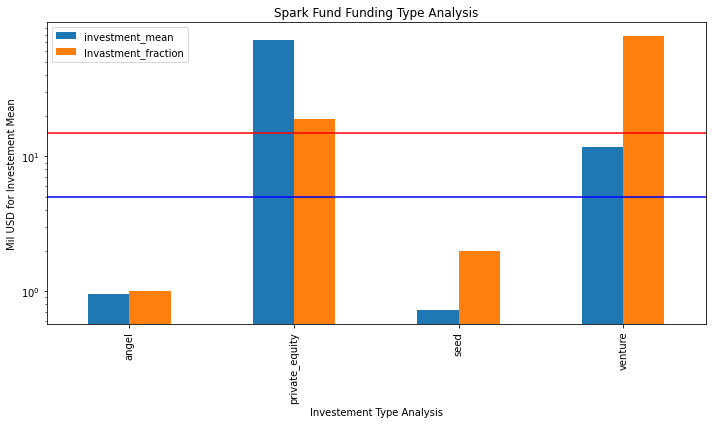

In [93]:
ax = investment_metrics.plot.bar(figsize=(10,6))

plt.axhline(5, color='blue') # Investement limits of Spark Fund
plt.axhline(15, color='red')
plt.yscale('log')

ax.set_title('Spark Fund Funding Type Analysis')
ax.set_ylabel('Mil USD for Investement Mean')
ax.set_xlabel('Investement Type Analysis')

plt.tight_layout()
plt.show()



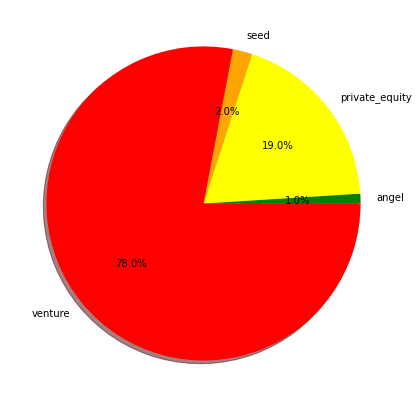

In [94]:
labels = 'angel', 'private_equity', 'seed', 'venture'
plt.figure(figsize=(6,6))
colors = ['green','yellow','orange', 'Red']
plt.pie(Invastment_fraction,  labels=labels, colors=colors, autopct='%1.1f%%', shadow=True)
plt.tight_layout()

<function matplotlib.pyplot.show(close=None, block=None)>

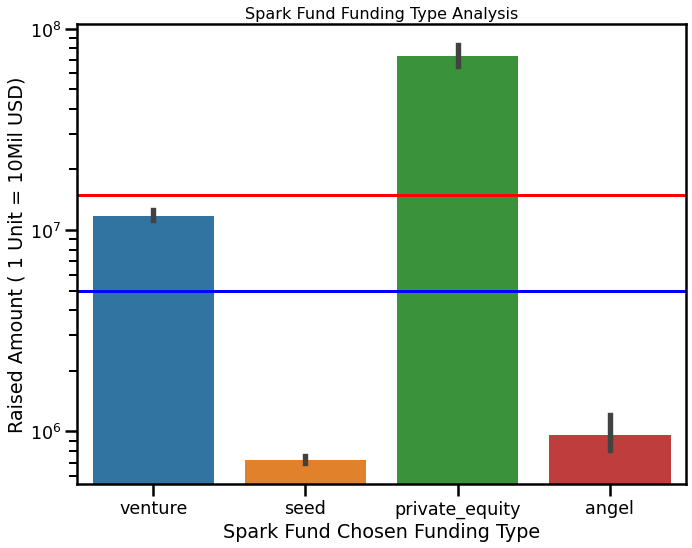

In [95]:
sns.set_context('poster',font_scale=0.8)
plt.figure(figsize=(10,8))
g=sns.barplot(x='funding_round_type', y='raised_amount_usd', data=funding_frame)

g.set(xlabel='Spark Fund Chosen Funding Type', ylabel='Raised Amount ( 1 Unit = 10Mil USD)')
g.set_title('Spark Fund Funding Type Analysis',fontsize =16)

# Lines to mark investement limits of Spark Find
plt.axhline(5000000, color='blue')
plt.axhline(15000000, color='red')

plt.yscale('log')
plt.tight_layout()
plt.show


PLotting top countries investment

In [99]:
top_countries

country_code
USA   422510842796.00
CHN    39835418773.00
GBR    20245627416.00
IND    14391858718.00
CAN     9583332317.00
FRA     7259536732.00
ISR     6907514579.00
DEU     6346959822.00
JPN     3363676611.00
Name: raised_amount_usd, dtype: float64

In [101]:
three_countries_sect_master=D1[D1['main_sector'].isin(['Others','Social, Finance, Analytics, Advertising','Cleantech / Semiconductors'])]

In [102]:
three_countries_sect_master=three_countries_sect_master.append(D2[D2['main_sector'].isin(['Others','Social, Finance, Analytics, Advertising','Cleantech / Semiconductors'])], ignore_index=True)

In [103]:
three_countries_sect_master=three_countries_sect_master.append(D3[D3['main_sector'].isin(['Others','Social, Finance, Analytics, Advertising','News, Search and Messaging'])], ignore_index=True)

In [104]:
three_countries_sect_master.shape

(8612, 21)

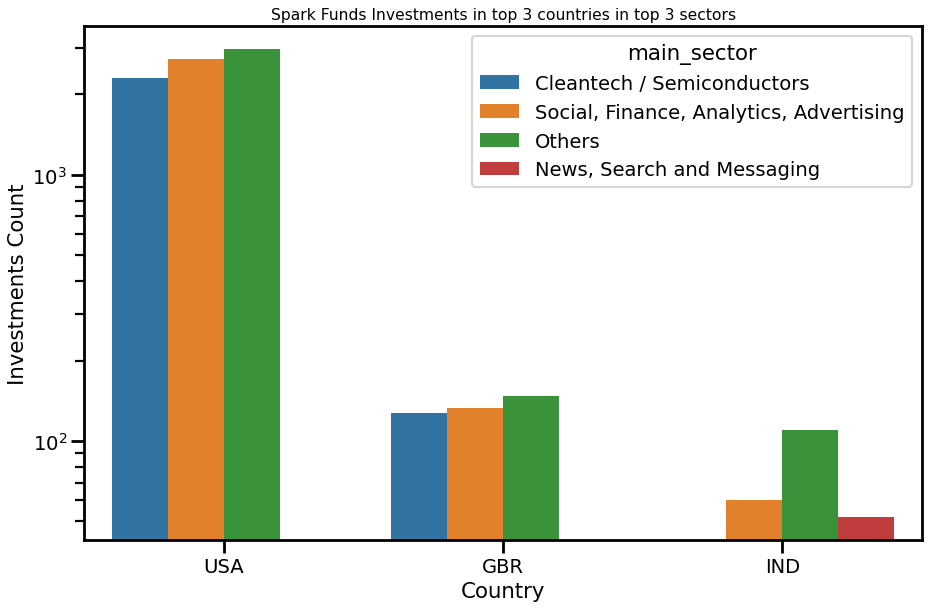

In [107]:
plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')


s=sns.barplot(x='country_code', y='raised_amount_usd', hue="main_sector", data=three_countries_sect_master,estimator=lambda x: len(x))
s.set(xlabel='Country', ylabel='Investments Count')
s.set_title('Spark Funds Investments in top 3 countries in top 3 sectors',fontsize =14)

plt.yscale('log')
plt.tight_layout()
plt.show()

End Of Analysis